# Predicting Airline Passenger Satisfaction with Machine Learning
***

![Happy passengers on a plane](./Images/Happy-passengers.avif)

**Author:** [Emmi Galfo](mailto:emmi.galfo@gmail.com)
***

## Overview 
***
This project looks into which factors contribute most in predicting airline customer satisfaction. By using machine learning modeling to analyze customer survey data, I was able to predict which factors were most important for passenger satisfaction and provide actionable insights for airlines to improve their overall customer experience. The final model used XGBoost and had a precision score of 97%. My results showed that the option for online boarding, the reason for travel(personal vs business travel), and the presence of inflight wifi service had the most impact on overall satisfaction. 

## Business Problem 
***
Airline companies strive to provide excellent customer service. Understanding which factors to focus investments on can increase customer retention, enhance customer experience, increase revenue, reduce costs, and improve brand image. The goal is to predict which factors are most important for passenger satisfaction and provide actionable insights for airlines to improve their overall customer experience. 


## Data Understanding
***

For this project, a large dataset regarding airline passenger satisfaction and travel features was downloaded from kaggle.com. 
Below are descriptions taken from the database describing each column.  

### Column names and descriptions:
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats
%matplotlib inline

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve 
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import make_scorer, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

When downloaded, the dataset was already split into training and testing datasets. 

In [2]:
#Load Training DataFrame
train = pd.read_csv('AirlineDataSet/train.csv', index_col=[0])
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#Load Testing DataFrame
test = pd.read_csv('AirlineDataSet/test.csv', index_col=[0])
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


## EDA
***

In [48]:
#Look at shapes of both training and testing dataframes
print(f'Training shape: {train.shape}')
print(f'Testing shape: {test.shape}')
print('Train/Test split:', len(train)/(len(train)+len(test)))
print('Total rows: ', 103904+25976)

Training shape: (103904, 23)
Testing shape: (25976, 23)
Train/Test split: 0.8
Total rows:  129880


The training data is 80% of the full dataset. So we are working with an 80:20 split. This is good. We can leave that alone. 
Next, lets look into the columns to see what data types we are working with as well as look for null values. 

In [6]:
#Check out columns
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
#Check for null values
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

The dataset mostly consists of numerical and categorical data. As for missing values, there are 310 null values in the 'Arrival Delay in Minutes' column. 

In [8]:
#Look at Numerical columns
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


Let's look at how the numerical columns correlate with one another. 

<AxesSubplot:>

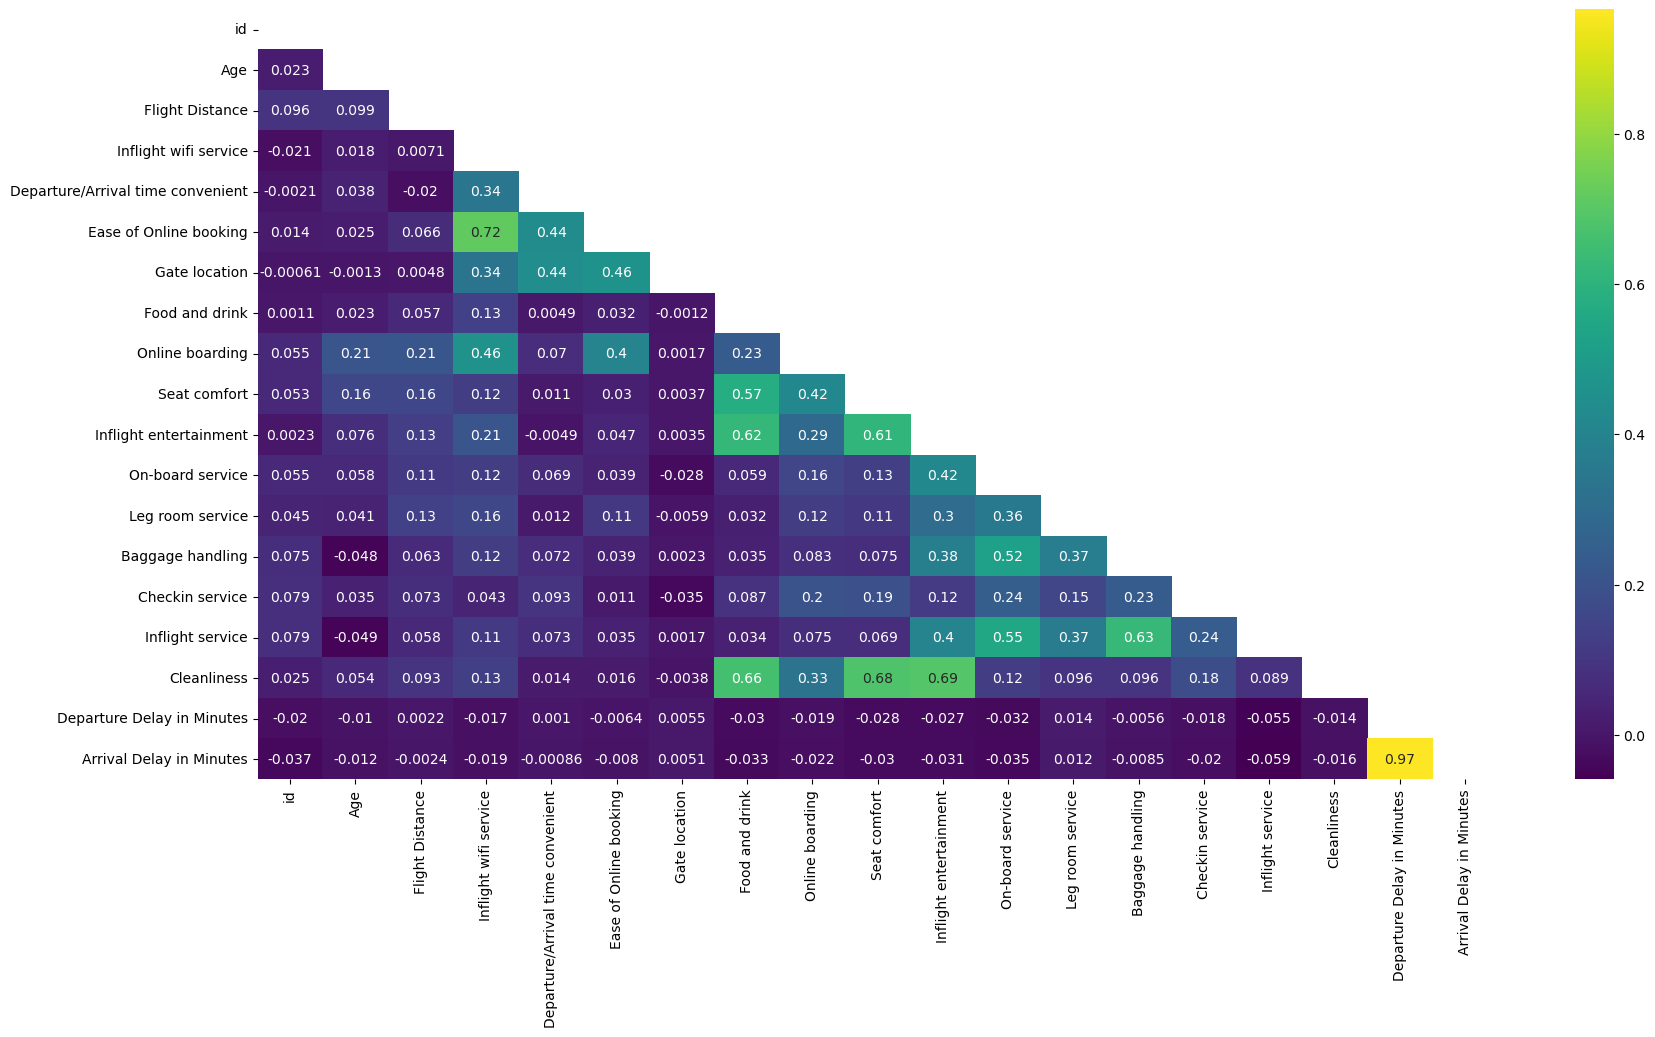

In [10]:
#Create a heatmap to look at how the features correlate with one another
train_num = train.select_dtypes('number')
train_num

corr = train_num.corr()

# Create a mask to only show the lower triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
# Create the heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='viridis', annot=True, mask=mask)

Top correlations as seen in the heat map:
* Departure delay and arrival delay are the most strongly correlated.
* Next is ease of online booking and inflight wifi service.
* Finally, cleanliness is correlated with food and drink, seat comfort, and inflight entertainment. 

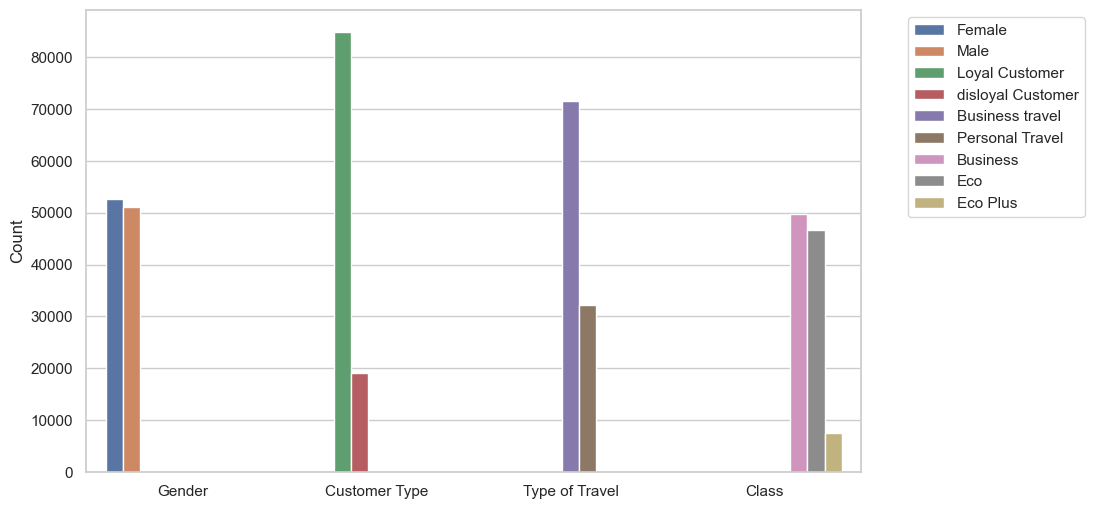

In [64]:
#Look at categorical columns
cat = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Reshape categorical variables into a tidy format
train_melted = pd.melt(train, value_vars=cat)

# Create grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=train_melted, x="variable", hue="value", hue_order=['Female', 'Male', 'Loyal Customer', 'disloyal Customer', 'Business travel', 'Personal Travel', 'Business', 'Eco', 'Eco Plus'], ax=ax)

ax.set_xlabel("")
ax.set_ylabel("Count")

plt.xticks([0, 1, 2, 3], cat, rotation=0)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

We can see that there were more loyal customers than disloyal customers, more business travelers than personal travelers, and more business and eco seats than eco plus seats. 

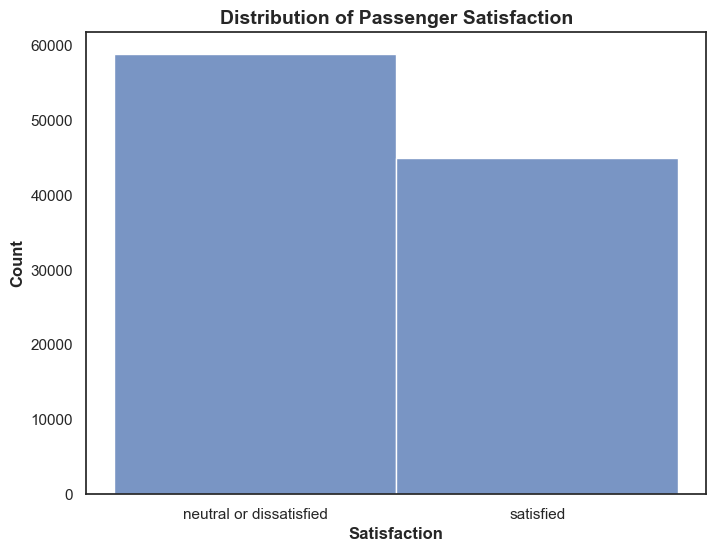

In [66]:
#look at target column
sns.set_style('white')

# Create histogram
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=train['satisfaction'], kde=False, ax=ax)

# Add labels and titles
ax.set_xlabel('Satisfaction', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Passenger Satisfaction', fontsize=14, fontweight='bold')

plt.show()

As we can see from the graph above, there are fairly equal amounts of satisfied and neutral/dissatisfied customers. 

## Data Preparation

#### Initial steps
* Drop unneccessary rows
* Split data into target and features


In [13]:
#Drop id, an unnecessary column, from both the test and training data sets.
train.drop('id', inplace=True, axis=1)
test.drop('id', inplace=True, axis=1)

In [14]:
# Split data into target and features
#Training data
X_train = train.drop('satisfaction', axis=1)
y_train = train.satisfaction

#Test data
X_test= test.drop('satisfaction', axis=1)
y_test = test.satisfaction

#### Preprocessing pipeline
Let's create a pipeline in order to easily replicate how we process the training data with any later testing data. A pipeline will help streamline the process and lead to more consistent and reproducible results. 
* Split data into numerical and categorical data
* Numerical: 
    * Fill in Null Values Using SimpleImputer
    * Scale Data using Standard Scaler
* Catigorical:
    * One hot encode
    

In [15]:
#split features into categorical and numerical data
X_train_cat = X_train.select_dtypes('object') #will get the categorical columns
X_train_num = X_train.select_dtypes('number') #will get both float and int columns

#Create a pipeline to preprocess the categorical data: 
#use an imputer to deal with missing values
#scale the data
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                   ('scaler', StandardScaler())])

#Create a pipeline to preprocess the numerical data:
#onehot encode
cat_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))]) 

#Column transformer
trans = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, X_train_num.columns),
    ('categorical', cat_pipeline, X_train_cat.columns)])



Fit and transform the training set:

In [16]:
#fit transform X_train
X_train_preprocessed = trans.fit_transform(X_train)

categorical_columns = list(trans.transformers_[1][1].named_steps['ohe'].get_feature_names())
numerical_columns = list(X_train_num.columns)
column_names = numerical_columns + categorical_columns

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, 
                                    columns= column_names, index=X_train.index)

X_train_preprocessed.head()

/Users/emmi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,x0_Male,x1_disloyal Customer,x2_Personal Travel,x3_Eco,x3_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0.549799,1.156436,1.305870,0.266393,0.074169,1.0,0.0,1.0,0.0,1.0
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,1.0,1.0,0.0,0.0,0.0
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.549799,0.305848,1.305870,-0.387532,-0.391554,0.0,0.0,0.0,0.0,0.0
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,-1.821012,0.305848,-0.980251,-0.099805,-0.158692,0.0,0.0,0.0,0.0,0.0
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554,1.0,0.0,0.0,0.0,0.0


Transform the test set 

In [17]:
#Transform X_test
X_test_preprocessed = trans.transform(X_test)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=column_names, index=X_test.index)
X_test_preprocessed.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,x0_Male,x1_disloyal Customer,x2_Personal Travel,x3_Eco,x3_Eco Plus
0,0.834958,-1.032398,1.709804,0.616172,0.173776,0.800803,-0.152031,0.555482,-0.333108,1.231704,...,-1.030742,1.156436,1.305870,0.920317,0.746880,0.0,0.0,0.0,1.0,0.0
1,-0.223601,1.678348,-1.302646,-1.350954,0.173776,-1.547323,1.352264,0.555482,1.183099,0.481508,...,-0.240472,0.305848,1.305870,-0.387532,-0.391554,0.0,0.0,0.0,0.0,0.0
2,-1.282160,-1.000307,-0.549533,-2.006662,-0.541060,0.800803,-0.904178,-0.926545,-1.091211,-1.018885,...,-1.030742,-1.395328,-0.980251,-0.387532,-0.391554,1.0,1.0,0.0,1.0,0.0
3,0.305678,2.193821,-2.055758,-2.006662,-1.970731,-0.764614,-0.152031,0.555482,0.424996,-1.769081,...,-0.240472,-2.245916,0.543829,-0.387532,-0.236313,1.0,0.0,0.0,0.0,0.0
4,0.636478,-0.007470,-0.549533,-0.039537,0.888612,0.018094,0.600117,-1.667559,-1.091211,-1.018885,...,0.549799,-1.395328,0.543829,-0.387532,0.125916,0.0,0.0,0.0,1.0,0.0


In [18]:
#Label encode targets train and test
encode = LabelEncoder()
y_train_encoded = encode.fit_transform(y_train)
y_test_encoded = encode.transform(y_test)
y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name=y_train.name)
y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name=y_test.name)

## Modeling

The goal of using machine learning modeling for this project is to identify the factors that are most important for predicting passenger satisfaction and to develop a model that can accurately classify passengers as either satisfied or dissatisfied.

The approach to this problem is to create a model that minimizes False Positives so that it does not predict many passengers are satisfied when they are not.  The model will be evaluated using a precision score. This explains out of all the satisfied predictions how many are correctly labeled. 



### Model 1: Logistic Regression 
Start with simple logistic regression classifier

In [19]:
#Instantiate Logistic Regression
model_1 = LogisticRegression(random_state=42)

#fit model to training set
model_1.fit(X_train_preprocessed, y_train_encoded)

#make predictions
model_1_train_pred = model_1.predict(X_train_preprocessed)
model_1_test_pred = model_1.predict(X_test_preprocessed)

#training predictions
print('precision score:', precision_score(y_train_encoded, model_1_train_pred))
print('recall score:', recall_score(y_train_encoded, model_1_train_pred))
print('accuracy score:', accuracy_score(y_train_encoded, model_1_train_pred))
print('f1 score:', f1_score(y_train_encoded, model_1_train_pred))

precision score: 0.8705887794274085
recall score: 0.8361132704053303
accuracy score: 0.8751251154912226
f1 score: 0.8530028209863255


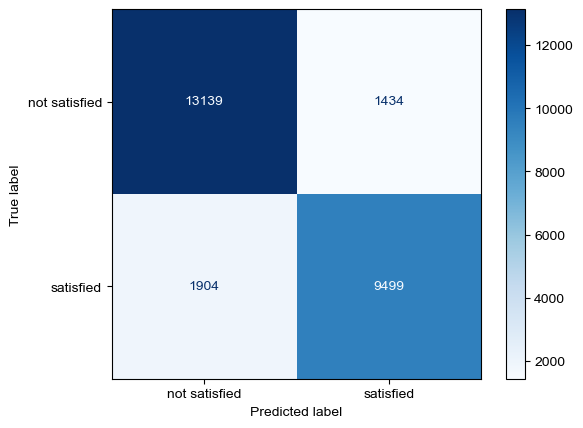

In [20]:
#plot confusion matrix
cm = confusion_matrix(y_test_encoded, model_1_test_pred)
# Define the new labels
new_labels = ['not satisfied', 'satisfied']

# Create a ConfusionMatrixDisplay object and plot the confusion matrix with the new labels
cm_display = ConfusionMatrixDisplay(cm, display_labels=new_labels)
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d')
sns.set_style("white") 
plt.show()

The initial model returned a precision score of 87%. It is important that the dissatisfied customers are labeled correctly. The top two boxes on the table show all of the dissatisfied customers and are split based on whether the model predicted them correctly or not. The initial model correctly labeled 13,139 dissatisfied customers and mislabeled 1,434. 

In [22]:
#A classification report can also be printed to compile information based on satisfied or dissatisfied labels
print(classification_report(y_test_encoded, model_1_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



One benefit of using a logistic regression model is that it's possible to extract the coefficients. 

In [24]:
# Print the feature names and coefficients
feature_names = X_test_preprocessed.columns
coefficients = model_1.coef_[0]
for feature, coef in zip(feature_names, coefficients):
    print(feature, ': ', coef)

Age :  -0.1249913033400683
Flight Distance :  -0.016710318998313104
Inflight wifi service :  0.5240725545535693
Departure/Arrival time convenient :  -0.19045883241892267
Ease of Online booking :  -0.19994404916794478
Gate location :  0.03744999280271321
Food and drink :  -0.03673263233687425
Online boarding :  0.8262846295749436
Seat comfort :  0.08825108347528889
Inflight entertainment :  0.08550897483772466
On-board service :  0.38845244814009194
Leg room service :  0.3328080712611095
Baggage handling :  0.15823319428151378
Checkin service :  0.409324824227276
Inflight service :  0.14104244951986802
Cleanliness :  0.2924833813654508
Departure Delay in Minutes :  0.15720392828896002
Arrival Delay in Minutes :  -0.33991342076176084
x0_Male :  0.040666537965703825
x1_disloyal Customer :  -2.0331191785602365
x2_Personal Travel :  -2.7171795634345473
x3_Eco :  -0.7371062539218983
x3_Eco Plus :  -0.8514146062791574


### Model 2: Decision Tree

In [25]:
#Instantiate tree
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_preprocessed, y_train_encoded)
model_2_train_pred = model_2.predict(X_train_preprocessed)
print(classification_report(y_train_encoded, model_2_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [26]:
#test set
model_2_test_pred = model_2.predict(X_test_preprocessed)
print(classification_report(y_test_encoded, model_2_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



The second model did substantially better! It produced a precision score of 95%, which is up from 87%.

### Model 3: Random Forest

In [71]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train_preprocessed, y_train_encoded)

# Predict the test set
y_pred = rfc.predict(X_test_preprocessed)

# Evaluate the accuracy of the model
accuracy = rfc.score(X_test_preprocessed, y_test_encoded)
print("Accuracy:", accuracy)


Accuracy: 0.962696335078534


In [73]:
#Look at the classification report to evaluate model 3
model_3_test_pred = rfc.predict(X_test_preprocessed)
print(classification_report(y_test_encoded, model_3_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Running a grid search can help identify the best parameters for the Random Forest. 

### Grid Search

Create an initial grid search

In [30]:
# Define the parameter grid
param_grid = {'n_estimators': [25, 100], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 50]}

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search 
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

Best parameters:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
Best precision:  0.9639203312256075


In [75]:
rfc = RandomForestClassifier(random_state=42, max_depth=15, min_samples_split=5, n_estimators=100)
rfc.fit(X_train_preprocessed, y_train_encoded)
print(classification_report(y_test_encoded, rfc.predict(X_test_preprocessed), digits=4))

              precision    recall  f1-score   support

           0     0.9548    0.9720    0.9633     14573
           1     0.9634    0.9412    0.9522     11403

    accuracy                         0.9585     25976
   macro avg     0.9591    0.9566    0.9578     25976
weighted avg     0.9586    0.9585    0.9584     25976



The parameters from the first grid search can be used to adjust a second grid search

In [32]:
# Define the parameter grid expanding on the previous findings
param_grid = {'n_estimators': [100, 200], 'max_depth': [15, 20, 30], 'min_samples_split': [2, 5, 10]}

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search #SET OPTIMAL SCORING
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

Best parameters:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best precision:  0.9718065176195122


In [74]:
rfc_best_params = RandomForestClassifier(random_state=42, max_depth=30, min_samples_split=2, n_estimators=200)
rfc_best_params.fit(X_train_preprocessed, y_train_encoded)
print(classification_report(y_test_encoded, rfc_best_params.predict(X_test_preprocessed), digits=4))

              precision    recall  f1-score   support

           0     0.9553    0.9793    0.9672     14573
           1     0.9726    0.9415    0.9568     11403

    accuracy                         0.9627     25976
   macro avg     0.9640    0.9604    0.9620     25976
weighted avg     0.9629    0.9627    0.9626     25976



### Model 4: XGBOOST

In [34]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train_encoded)
print(classification_report(y_test_encoded, xgb_model.predict(X_test_preprocessed), digits=4))

              precision    recall  f1-score   support

           0     0.9585    0.9773    0.9678     14573
           1     0.9702    0.9460    0.9580     11403

    accuracy                         0.9635     25976
   macro avg     0.9644    0.9616    0.9629     25976
weighted avg     0.9637    0.9635    0.9635     25976



### Grid Search

In [35]:
#Define the parameter grid
param_grid = {
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 5, 7],
}

# Create a xgboost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search #SET OPTIMAL SCORING
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Best precision:  0.9728783719439351


Create a second grid search based on the results of the first one. 

In [36]:
#Define the parameter grid based on previous results
param_grid = {
    "learning_rate": [0.05, 0.01, 0.005],
    "n_estimators": [1000],
    "max_depth": [7, 15],
}

# Create a xgboost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

scoring = make_scorer(precision_score)

# Perform a grid search #SET OPTIMAL SCORING
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=scoring)

# Fit the model to the training data
grid_search.fit(X_train_preprocessed, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best precision: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Best precision:  0.9728783719439351


### Final Model

In [37]:
#instantiate the classifier
final_model = xgb.XGBClassifier(random_state=42, learning_rate=0.01, n_estimators=1000, max_depth=7)

#fit the model to the training data
final_model.fit(X_train_preprocessed, y_train_encoded)

#test the model and print a classification report
print(classification_report(y_test_encoded, final_model.predict(X_test_preprocessed), digits=4))

              precision    recall  f1-score   support

           0     0.9547    0.9790    0.9667     14573
           1     0.9723    0.9406    0.9562     11403

    accuracy                         0.9622     25976
   macro avg     0.9635    0.9598    0.9614     25976
weighted avg     0.9624    0.9622    0.9621     25976



In [76]:
print('precision score:', precision_score(y_test_encoded, final_model.predict(X_test_preprocessed)))
print('recall score:', recall_score(y_test_encoded, final_model.predict(X_test_preprocessed)))
print('accuracy score:', accuracy_score(y_test_encoded, final_model.predict(X_test_preprocessed)))
print('f1 score:', f1_score(y_test_encoded, final_model.predict(X_test_preprocessed)))

precision score: 0.9722625090645395
recall score: 0.940629658861703
accuracy score: 0.962157376039421
f1 score: 0.9561845330956096


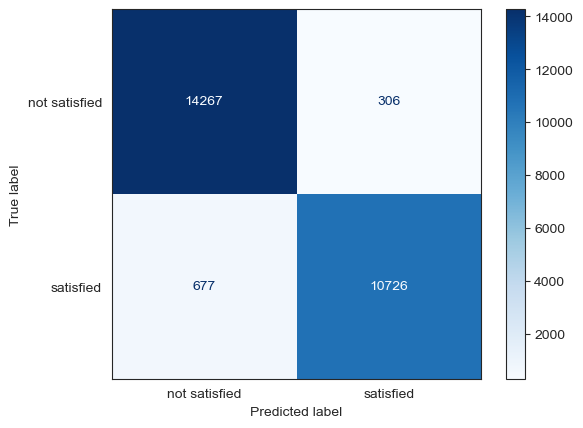

In [39]:
#create a confusion matrix
cm = confusion_matrix(y_test_encoded, final_model.predict(X_test_preprocessed))
new_labels = ['not satisfied', 'satisfied']

# Create a ConfusionMatrixDisplay object and plot the confusion matrix with the new labels
cm_display = ConfusionMatrixDisplay(cm, display_labels=new_labels)
cm_display.plot(cmap='Blues', xticks_rotation='horizontal')
sns.set_style("white") 
plt.show()

The final model has a precision score of 97%! This is much better than the initial score. The final model only mislabelled 306 dissatisfied customers. 

The final model looks good, next steps include pulling out the important features and making recommendations. 

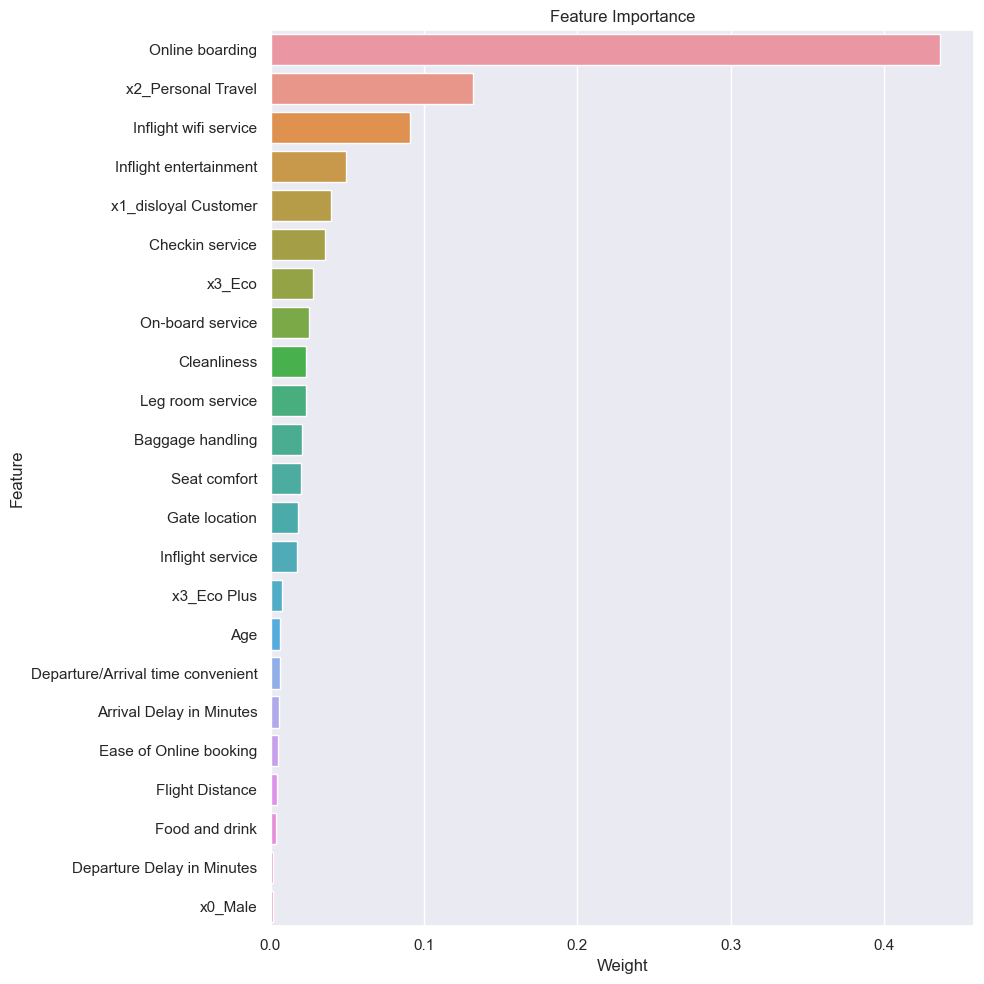

In [40]:
def plot_importance(model, features, num=len(X_train_preprocessed)):
    feature_imp = pd.DataFrame({'Weight': model.feature_importances_, 'Feature': features.columns})
    # print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Weight', y='Feature', data=feature_imp.sort_values(by='Weight', ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show(block=True)

plot_importance(final_model, X_train_preprocessed)


When looking at the top important features, all that can be determined is the imact they have. The graph does not explain whether these impacts are positively or negatively correlated with satisfaction. However, the coefficients from the logistic regression model can be used to help determine the relationship between the feature and the satsifaction of a customer. 

Top 3 features from XGBoost and their corresponding logistic regression coefficients:
* Online boarding: 0.82
* Personal travel: -2.71
* Inflight wifi: 0.52

Based on the logistic regression results, online boarding and inflight WiFi are positively correlated with satisfaction, while personal travel is negatively correlated. 

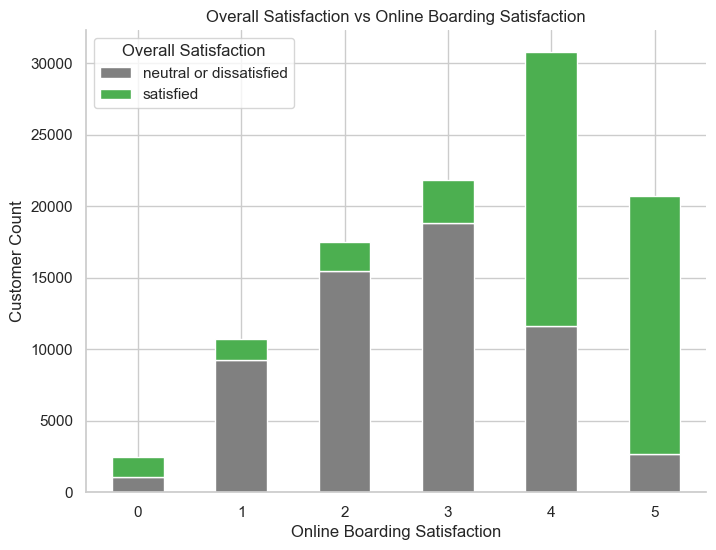

In [41]:
# create a cross-tabulation table
ct = pd.crosstab(train['Online boarding'], train['satisfaction'])

# create a stacked bar chart using seaborn
sns.set(style='whitegrid')
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0,
             color=['#808080', '#4CAF50'])  # specify color palette
ax.set_xlabel('Online Boarding Satisfaction')
ax.set_ylabel('Customer Count')
ax.set_title('Overall Satisfaction vs Online Boarding Satisfaction')
ax.legend(title='Overall Satisfaction', loc='upper left')
sns.despine()

The feature that had the highest impact by far on customer satisfaction was online boarding.  Passengers ranked their satisfaction of online boarding from 0-5 with 5 being the most satisfied. On the graph, customers who were satisfied with their overall experience are shown in green.  The graph shows that as the customers ranked online boarding higher they were more likely to be satisfied overall. 

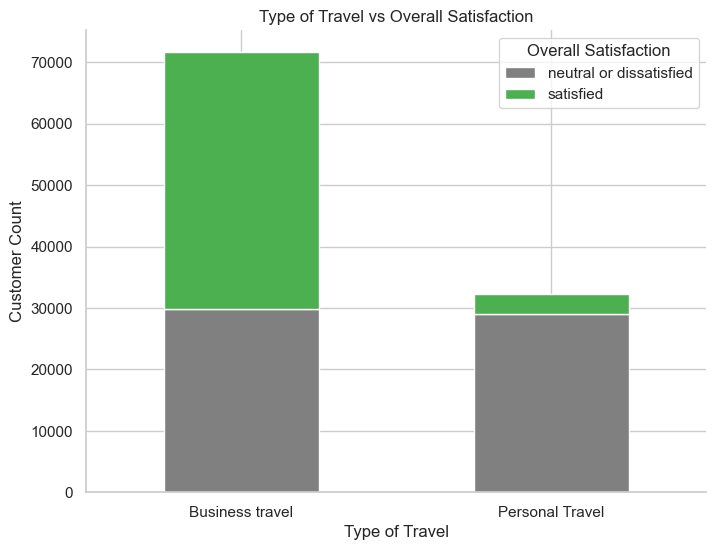

In [42]:
#Customer Satisfaction vs Personal Travel
# create a cross-tabulation table
ct = pd.crosstab(train['Type of Travel'], train['satisfaction'])

# create a stacked bar chart using seaborn
sns.set(style='whitegrid')
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0,
             color=['#808080', '#4CAF50'])  # specify color palette
ax.set_xlabel('Type of Travel')
ax.set_ylabel('Customer Count')
ax.set_title('Type of Travel vs Overall Satisfaction')
ax.legend(title='Overall Satisfaction', loc='upper right')
sns.despine()

Personal travel was the second most important indicator of overall satisfaction. The graph shows that personal travel is highly correlated with overall dissatisfaction.  

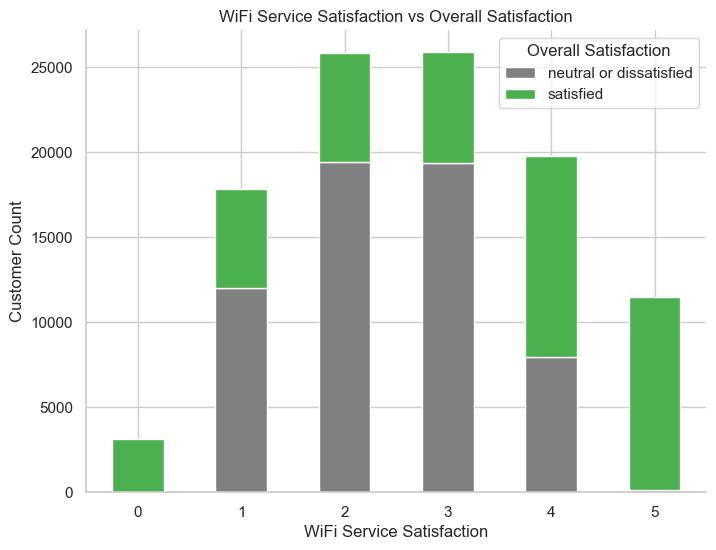

In [77]:
#Customer Satisfaction vs Inflight WiFi
# create a cross-tabulation table
ct = pd.crosstab(train['Inflight wifi service'], train['satisfaction'])

# create a stacked bar chart using seaborn
sns.set(style='whitegrid')
ax = ct.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0,
             color=['#808080', '#4CAF50'])  # specify color palette
ax.set_xlabel('WiFi Service Satisfaction')
ax.set_ylabel('Customer Count')
ax.set_title('WiFi Service Satisfaction vs Overall Satisfaction')
ax.legend(title='Overall Satisfaction', loc='upper right')
sns.despine()

The third highest indicator of overall satisfaction was inflight WiFi service. Higher ratings of wifi service satisfaction tended to result in higher levels of overall satisfaction. 

## Results and Conclusions
***
***Results*** 
* The final and best model was an XGBoost classifier. 
* The model had a precision score of 97%
* The model's predictions resulted in false negatives only 2% of the time. 
* The top 3 features that had the most impact on predicting passenger satisfaction were the following:
    * online boarding
    * personal travel
    * inflight wifi service

* The 3 features that had the least impact on predicting passenger satisfaction were the following:
    * gender
    * departure delay
    * food and drink

***Insights and Recommendations***
1. Online boarding streamlines the check-in and boarding process. It offers customers a convenient way to check-in, pay for bags, reserve seats, and obtain boarding passes. This is the number one feature that customers valued. Putting resources into online boarding to keep it state of the art may go a long way in terms of improving customer satisfaction. 
2. There are two main reasons to travel, personal and business. When customers were traveling for personal reasons, they were more likely to be dissatisfied with the experience. This may stem from who is paying for the travel-- personal payees versus corporate payees. The action item is looking deeper into what factors contribute to their dissatisfaction. This is a good area to look at further. 
3. The third most important feature in predicting satisfaction was the inflight wifi service. My recommendation is to put resources into exploring opportunities to optimize the WiFi service during flight. 

***Limitations***
* Data bias- dataset may not be representative of the general population.
* Limited feature set- There may be important features not accounted for such as weather. 
* Changes in data distribution- if customer preferences or behaviors change over time, the model may need to be updated to reflect these changes.

***Next Steps***
* Explore which features are most important to personal travelers.
* Expand the data set to include more airlines and/or more features.